## Overview

Same as GalaxyCount but for stars

In [1]:
import sys
sys.path.insert(1, '/afs/hep.wisc.edu/home/kkboone/software/StarWeights/FinalPipeline')
import fitsio
import numpy as np
import healpy as hp
import scipy as sc
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib
from scipy import interpolate as inter
from astropy.table import Table
import StellarConfig as strConfig
import Config
# from matplotlib.path import Path Cut has already been applied
matplotlib.style.use('des_dr1')

In [2]:
directory = '/hdfs/bechtol/balrog/y3/y3a2_survey_conditions_maps/Kyle_Stuff/MaximumLikelihood/FinalPipeline/Tests/Object_Counts/'

### Areas of Interest

In [3]:
# pixFile = strConfig.pixFile
# condFiles = strConfig.condFiles

In [4]:
# condPix = fitsio.read(pixFile)['PIXEL']

In [5]:
# helpRa, helpDec = hp.pixelfunc.pix2ang(4096, np.arange(12*(4096**2)), nest=True, lonlat=True)

In [6]:
# ra30Pix = np.where((helpRa >= 27) & (helpRa <= 29.5) & (helpDec >= -20) & (helpDec <= -5))[0]
# ra30Crop = np.isin(condPix, ra30Pix)

In [7]:
# galaPlanePix = np.where((helpRa >= 270) & (helpRa <= 315) & (helpDec <= -30))[0]
# galaPlaneCrop = np.isin(condPix, galaPlanePix)

In [8]:
# randomPix = np.where((helpRa >= 40) & (helpRa <= 50) & (helpDec >= -25) & (helpDec <= -20))[0]
# randomCrop = np.isin(condPix, randomPix)

In [9]:
# ra30Conds = []
# galaPlaneConds = []
# randomConds = []

# for condFile in condFiles:
#     condData = fitsio.read(condFile)['SIGNAL']
#     ra30Conds.append(np.average(condData[ra30Crop]))
#     galaPlaneConds.append(np.average(condData[galaPlaneCrop]))
#     randomConds.append(np.average(condData[randomCrop]))
    
# ra30Conds = np.array(ra30Conds)
# galaPlaneConds = np.array(galaPlaneConds)
# randomConds = np.array(randomConds)

In [10]:
# conditionsFile = directory + 'Three_Locations_Properties.fits'
# # conditions_table = Table()
# # conditions_table['RA_30'] = ra30Conds
# # conditions_table['GALA_PLANE'] = galaPlaneConds
# # conditions_table['RANDOM'] = randomConds
# # conditions_table.write(conditionsFile, overwrite = True)

In [11]:
# ra30Conds = fitsio.read(conditionsFile)['RA_30']
# galaPlaneConds = fitsio.read(conditionsFile)['GALA_PLANE']
# randomConds = fitsio.read(conditionsFile)['RANDOM']

### Actual Algorithm

In [12]:
def mostSigInd(y):
    maxSquaredDiff = 0
    index = -1
    
    maxSingError = np.max(np.abs(y - 1))
    
    if maxSingError <= cutOffPercent:
        return index, maxSingError
    
    for i in range(len(y)):
        yi = y[i]
        
        diff = np.sum((yi - 1)**2)
        
        if diff > maxSquaredDiff:
            maxSquaredDiff = diff
            index = i
            
    return index, maxSingError

In [13]:
cutOffPercent = .01
res = 4096
binNum = 10
classCut = 1.5
# path = strConfig.path Cut has already been applied
# mu = strConfig.mu
rMagCut = [23.9, 24.5]
conditions = Config.conditions

In [14]:
# validPixFile = strConfig.detStarAllPosFile

In [15]:
# validPix = np.unique(fitsio.read(validPixFile)['PIXEL'])

In [16]:
# # This includes a test1a part
# oldValidPixFile = '/hdfs/bechtol/balrog/y3/y3a2_survey_conditions_maps/Kyle_Stuff/MaximumLikelihood/BalrogTests/Test1/ValidPix.fits'

In [17]:
# oldValidPix = fitsio.read(oldValidPixFile)['PIXEL']

# NOTE:

I just copy and pasted this. Every gala should just be replaced by star from here on out.

In [18]:
# # Already has color and quality cuts applied.
# matStarFile = strConfig.matStarFile

In [19]:
# matStarData = fitsio.read(matStarFile)

In [20]:
# matStarRA = matStarData['RA']
# matStarDEC = matStarData['DEC']
# # matStarGMAG = matStarData['GMAG'] Unnecessary, cuts are based on RMAG
# matStarRMAG = matStarData['RMAG']
# matStarCLASS = matStarData['CLASS']

# # Naming conventions changing to match original file
# matPix = hp.ang2pix(res, matStarRA, matStarDEC, nest = True, lonlat = True)

# pixCut = np.isin(matPix, validPix)
# matPix = matPix[pixCut]
# matRmag = matStarRMAG[pixCut]
# matClass = matStarCLASS[pixCut]

# magCut = np.where((matRmag <= rMagCut[1]) & (matRmag > rMagCut[0]))[0]
# matPix = matPix[magCut]
# matClass = matClass[magCut]

# classCuts = np.where((matClass >= 0) & (matClass <= classCut))[0]
# matPix = matPix[classCuts]

# origDetPix = np.copy(matPix)
# origDetPix = np.sort(origDetPix)

In [21]:
# _, origAllDetPixCounts = np.unique(np.append(validPix, origDetPix), return_counts = True)
# origAllDetPixCounts = origAllDetPixCounts - 1

In [22]:
# origCondFiles = []
# for cond in conditions:
#     origCondFiles.append('/hdfs/bechtol/balrog/y3/y3a2_survey_conditions_maps/Kyle_Stuff/MaximumLikelihood/BalrogTests/Test1/Conds/' + cond + '.fits')
# origCondFiles = np.array(origCondFiles)

# origCondMaps = []
# newPixCrop = np.isin(oldValidPix, validPix)

# # This loops over every condition file
# for condFile in origCondFiles:
#     condData = fitsio.read(condFile) # This reads in the data
#     origCondMaps.append(condData['SIGNAL'][newPixCrop]) # Only stores the values that are in pixels with injections

# origCondMaps = np.array(origCondMaps)

In [23]:
# 1.5 for brightest bin
persToUse = np.logspace(1.5, 2, 20)

In [24]:
# # I think just change this to the valud pix but drop off the np.unique()
# allPixFile = strConfig.detStarAllPosFile

# origInjData = fitsio.read(allPixFile)

# origInjPix = origInjData['PIXEL']
# origValidPix = np.unique(origInjPix)

# origInjPix = np.sort(origInjPix)

# # Everything from here until the main loop is to generate matchInds

# origInjPixUnique, origInjPixCounts = np.unique(origInjPix, return_counts = True)

# matchInds = np.zeros(len(origDetPix), dtype = int)

# startInjInds = np.append(np.array([0]), np.cumsum(origInjPixCounts)[:-1])

# startDetInds = np.append(np.array([0]), np.cumsum(origAllDetPixCounts)[:-1])

# for i in np.arange(len(origAllDetPixCounts)):
#     if origAllDetPixCounts[i] == 0:
#         continue
#     matchInds[startDetInds[i]: startDetInds[i] + origAllDetPixCounts[i]] = np.arange(origAllDetPixCounts[i]).astype(int) + startInjInds[i]
    
# for perObjectsToUse in persToUse:
    
#     includeInds = np.full(len(origInjPix), False, dtype = bool)
#     includeInds[0:int((float(perObjectsToUse)*len(includeInds)) / 100)] = True
#     np.random.shuffle(includeInds)
    
#     detPix = origDetPix[includeInds[matchInds]]
#     injPix = origInjPix[includeInds]

#     validPix =  np.unique(injPix)
    
#     condCrop = np.isin(origValidPix, validPix)
    
#     constantTrainPixIndicator, origDetPixCounts = np.unique(np.append(validPix, detPix), return_counts = True)
#     origDetPixCounts = origDetPixCounts - 1
    
#     condMaps = []

#     # This loops over every condition file
#     for origCondMap in origCondMaps:
#         condMaps.append(origCondMap[condCrop]) # Only stores the values that are in pixels with injections

#     condMaps = np.array(condMaps)
    
#     trainInds = np.full(len(condMaps[0]), False, dtype = bool)
#     trainInds[0:int(0.8*len(trainInds))] = True
#     np.random.shuffle(trainInds)
    
#     aveDetTrain = np.sum(origDetPixCounts[trainInds]) / len(origDetPixCounts[trainInds])

#     sortInds = []
#     for i in range(len(condMaps)):
#         sortInds.append(condMaps[i][trainInds].argsort())
#     sortInds = np.array(sortInds)
    
#     binIndLims = [0]

#     for j in range(binNum):
#         binIndLims.append(int((np.sum(trainInds) - binIndLims[-1]) / (binNum - j)) + (binIndLims[-1]))
        
#     xBins = []

#     for i in range(len(condMaps)):
#         cond_Map_Sort = condMaps[i][trainInds][sortInds[i][::1]]
#         condBins = []
#         for j in range(binNum):
#             condBins.append(cond_Map_Sort[binIndLims[j]:binIndLims[j+1]])
#         indXBin = []

#         for j in range(binNum):
#             indXBin.append(np.sum(condBins[j]) / len(condBins[j]))

#         xBins.append(np.array(indXBin))

#     xBins = np.array(xBins)
    
#     yBinsOrig = []
#     for i in range(len(condMaps)):
#         detSort = origDetPixCounts[trainInds][sortInds[i][::1]]
#         detBins = []
#         for j in range(binNum):
#             detBins.append(detSort[binIndLims[j]:binIndLims[j+1]])
#         indYBinOrig = []

#         for j in range(binNum):
#             indYBinOrig.append(np.sum(detBins[j]) / (aveDetTrain * len(detBins[j])))

#         yBinsOrig.append(np.array(indYBinOrig))

#     yBinsOrig = np.array(yBinsOrig)
    
#     detPixCounts = np.copy(origDetPixCounts)
    
#     allErrors = []

#     while(True):

#         yBins = []
#         for i in range(len(condMaps)):
#             detSort = detPixCounts[trainInds][sortInds[i][::1]]
#             detBins = []
#             for j in range(binNum):
#                 detBins.append(detSort[binIndLims[j]:binIndLims[j+1]])
#             indYBin = []

#             for j in range(binNum):
#                 indYBin.append(np.sum(detBins[j]) / (aveDetTrain * len(detBins[j])))

#             yBins.append(np.array(indYBin))

#         yBins = np.array(yBins)

#         index, maxErr = mostSigInd(yBins)
#         if index == -1:
#             break

#         allErrors.append(maxErr)

#         corrFunc = inter.interp1d(xBins[index], yBins[index], bounds_error = False, fill_value = (yBins[index][0], yBins[index][-1]))

#         detPixCounts = detPixCounts / (corrFunc(condMaps[index]))

#         detPixCounts = detPixCounts * aveDetTrain / (np.sum(detPixCounts[trainInds]) / len(detPixCounts[trainInds]))
        
#     binIndLims = [0]

#     for j in range(binNum):
#         binIndLims.append(int((np.sum(~trainInds) - binIndLims[-1]) / (binNum - j)) + (binIndLims[-1]))
        
#     condMaxErrors = []
#     condSTDs = []
#     condRA30 = []
#     condGalaPlane = []
#     condRandom = []
    
#     aveDetTest = np.sum(detPixCounts[~trainInds]) / len(detPixCounts[~trainInds])

#     for condInd in range(len(condMaps)):
#         condMap = condMaps[condInd]
#         condSortInds = condMap[~trainInds].argsort()
        
#         cond_Map_Sort = condMaps[i][~trainInds][condSortInds[::1]]
#         condBins = []
#         for j in range(binNum):
#             condBins.append(cond_Map_Sort[binIndLims[j]:binIndLims[j+1]])
#         xBinCond = []

#         for j in range(binNum):
#             xBinCond.append(np.sum(condBins[j]) / len(condBins[j]))

#         detStarTemp = detPixCounts[~trainInds][condSortInds[::1]]

#         detBins = []

#         for j in range(10):
#             detBins.append(detStarTemp[binIndLims[j]:binIndLims[j+1]])

#         yBinCond = []

#         for j in range(10):
#             yBinCond.append(np.sum(detBins[j]) / (aveDetTest * len(detBins[j])))

#         yBinCond = np.array(yBinCond)
        
#         condErrFunc = inter.interp1d(xBinCond, yBinCond, bounds_error = False, fill_value = (yBinCond[0], yBinCond[-1]))

#         condMaxErrors.append(np.max(np.abs(yBinCond - 1)))
#         condSTDs.append(np.std(yBinCond))
#         condRA30.append(condErrFunc(ra30Conds[condInd]))
#         condGalaPlane.append(condErrFunc(galaPlaneConds[condInd]))
#         condRandom.append(condErrFunc(randomConds[condInd]))
        
#     condErrorsFile = directory + 'Stars/' + str(round(perObjectsToUse / 100, 3)) + '_Percent_' + str(rMagCut[0]) + '_' + str(rMagCut[1]) + '_Cond_Errors.fits'
#     my_table = Table()
#     my_table['Max_Errors'] = condMaxErrors
#     my_table['Standard_Devs'] = condSTDs
#     my_table['RA_30'] = condRA30
#     my_table['GALA_PLANE'] = condGalaPlane
#     my_table['RANDOM'] = condRandom
#     my_table.write(condErrorsFile, overwrite = True)
#     print(str(round(perObjectsToUse / 100, 3)) + ': ' + str(np.average(condMaxErrors)))

In [25]:
errorsData = []
for perObjectsToUse in persToUse:
    condErrorsFile = directory + 'Stars/Cond_Errors/' + str(round(perObjectsToUse / 100, 3)) + '_Percent_' + str(rMagCut[0]) + '_' + str(rMagCut[1]) + '_Cond_Errors.fits'
    errorsData.append(fitsio.read(condErrorsFile))

In [26]:
maxDevs = []
for i in range(len(persToUse)):
    maxDevs.append(errorsData[i]['Max_Errors'])

In [27]:
aveMaxDev = []
for maxDev in maxDevs:
    aveMaxDev.append(np.average(maxDev))

In [28]:
def func(x, C, b, k):
    return C*(x**(-1*k)) + b

In [29]:
popt, pcov = sc.optimize.curve_fit(func, persToUse, aveMaxDev, bounds=([0., 0., 0], [20, 0.1, 2]))
popt

array([0.57693502, 0.00503517, 0.54202434])

In [30]:
perr = np.sqrt(np.diag(pcov))
perr

array([0.51252552, 0.05051323, 0.41556017])

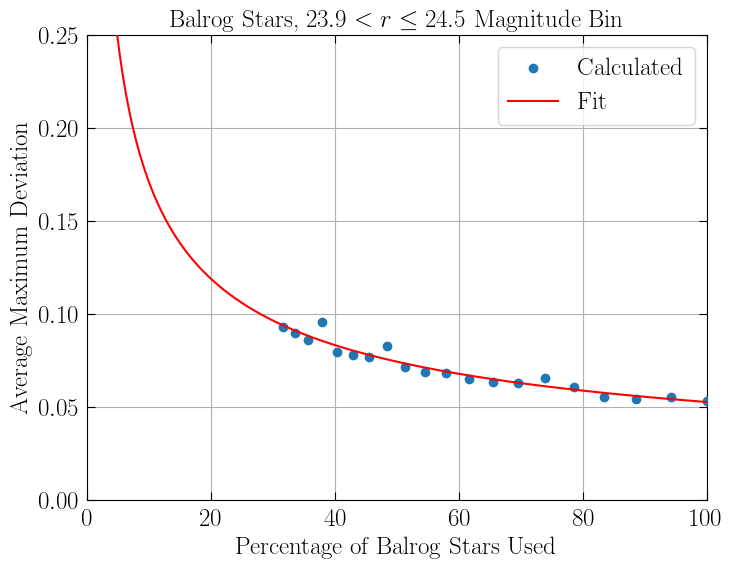

In [36]:
plt.figure()
plt.scatter(persToUse, aveMaxDev, zorder = 3, label = 'Calculated')
plt.plot(np.linspace(0.01, 100, 10000), func(np.linspace(0.01, 100, 10000), *popt), color = 'r', zorder = 3, label = 'Fit')
# plt.text(20, 0.225, r'$y = Cx^{-k} + b$', bbox={'facecolor': 'white', 'alpha': 1, 'pad': 10}, zorder = 3)
plt.legend()
plt.ylim([0, 0.25])
plt.xlim([0, 100])
plt.grid(zorder = 0)
plt.ylabel('Average Maximum Deviation')
plt.xlabel('Percentage of Balrog Stars Used')
plt.title(r'Balrog Stars, $23.9 < r \leq 24.5$ Magnitude Bin')
plt.show()

In [32]:
x_test = np.linspace(100, 500, 10000)
y_test = func(x_test, *popt)
y_test[-1]

0.02490615830510763

In [33]:
# stds = []
# pers = []
# for i in range(len(errorsData)):
#     stds.append(errorsData[i]['Standard_Devs'])
# for i in range(92):
#     pers.append(persToUse)
# stds = np.array(stds)
# pers = np.array(pers)
# stds = stds.T

In [34]:
# errorsData[-1]['Max_Errors'][39]

In [35]:
# plt.figure(dpi = 120)
# plt.hist2d(pers.flatten(), stds.flatten(), bins = [np.logspace(1.5, 2, 21), np.linspace(0.01, 0.06, 10)], cmap = 'Blues')
# plt.xscale('log')
# plt.show()